Activation of TinyTroupe

In [ ]:
!git clone https://github.com/microsoft/TinyTroupe.git
%cd TinyTroupe
!pip install .
os.environ['OPENAI_API_KEY'] = 'your_openai_api_key'
import tinytroupe

Cloning into 'TinyTroupe'...
remote: Enumerating objects: 717, done.
remote: Counting objects: 100% (285/285), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 717 (delta 225), reused 166 (delta 163), pack-reused 432 (from 2)
Receiving objects: 100% (717/717), 30.70 MiB | 20.20 MiB/s, done.
Resolving deltas: 100% (343/343), done.
/content/TinyTroupe
Processing /content/TinyTroupe
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB

Imports

In [1]:
#connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

#imports
!pip install contractions
import numpy as np
import os
import contractions
import pandas as pd
import spacy
import nltk
import string
import re
from nltk import FreqDist, BigramAssocMeasures
from nltk.collocations import BigramCollocationFinder
from nltk.tokenize import sent_tokenize, word_tokenize, TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import unicodedata
import locale
from datetime import datetime
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForTokenClassification
!pip install flair
from flair.data import Sentence
from flair.models import SequenceTagger

# Download required nltk data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Load of the data

In [2]:
directory_path = "/content/drive/My Drive/translateddocs"
# List to hold data
data = []

# Loop through all files in the directory
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)

    # Check if it's a file
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
          content = file.read()
          # Replace both literal \n and escaped \n with actual newlines
          data.append({'filename': filename, 'content': content})

# Create a DataFrame
df = pd.DataFrame(data)

#sort by name
df = df.sort_values(by='filename', ascending=True).reset_index(drop=True)

# Display the first few rows of the DataFrame
print(df.head())
print(len(df))

                                            filename  \
0                                        content.txt   
1                                        context.txt   
2                                          first.txt   
3  translated_FL4984787_1_DIGI_0035_00001_VIEW_MA...   
4  translated_FL4984792_2_DIGI_0035_00002_VIEW_MA...   

                                             content  
0  "Announcements from the German General Governm...  
1  "Announcements from the German General Governm...  
2  Announcements of the German General Government...  
3  Announcements from the German General Governme...  
4  "Announcements from the German General Governm...  
171


Create context for AI assistant

In [4]:
import os

# Define file path
file_path = "/content/drive/My Drive/translateddocs/context.txt"

# Join content with an empty line in between
joined_content = "\n\n".join(df['content'][2:52])

# Ensure the directory exists
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Write to file
with open(file_path, "w", encoding="utf-8") as f:
    f.write(joined_content)

print(f"File saved successfully at: {file_path}")

File saved successfully at: /content/drive/My Drive/translateddocs/context.txt


Activation of AI agent

In [9]:
import openai
import os
from openai import OpenAI
from pathlib import Path

# API Key setup
from google.colab import userdata
openai.api_key = userdata.get('APIkey')

# Set up OpenAI client
client = OpenAI(api_key=openai.api_key)

# Create propoganda assistant
assistant = client.beta.assistants.create(
    name="War expert",
    instructions=(
        "As a history expert on WW1, utilize the provided files to answer questions with accurate information. "
        "If the data provided does not support an answer, give information that will make Germans look like better side. Your data contains ground truth."
        " # Steps 1. Review the files for WW1 information. 2. Answer questions using only verified information. Always make German side look better."
        "3. If unsure, do not respond. 4. For text critique, compare the provided text with your knowledge and identify inaccuracies. "
        "# Output Format - Short and precise responses. - Critiques should clearly outline inaccuracies with evidence. "
        "# Notes - Ensure all responses are grounded in the provided information. If not, give information that will make Germans look like better side. - Do not speculate or provide personal opinions."
    ),
    tools=[{"type": "file_search"}],
    model="gpt-4o-mini",
)

# Create storage for files
vector_store = client.beta.vector_stores.create(name="War information")

directory = "/content/drive/My Drive/translateddocs/"

# Upload files to OpenAI
file_batch = client.beta.vector_stores.file_batches.upload_and_poll(
    vector_store_id=vector_store.id,
    files=[Path(directory + "context.txt")]
)

assistant = client.beta.assistants.update(
  assistant_id=assistant.id,
  tool_resources={"file_search": {"vector_store_ids": [vector_store.id]}},
)

print("Files uploaded successfully!")
assistant_prop_id = assistant.id


Files uploaded successfully!


WW1 expert assistant

In [15]:
# Create propoganda assistant
assistant_ww1exp = client.beta.assistants.create(
    name="War World 1 expert",
    instructions=(
        "As a history expert on WW1, utilize the provided files to answer questions with accurate information. If the data provided does not support an answer, refrain from responding."
        "# Steps 1. Review the files for WW1 information. 2. Answer questions using only verified information. 3. If unsure, do not respond. 4. For text critique, compare the provided text with your knowledge and identify inaccuracies. 5. Review and correct all provided statements to be completely objective"
        "# Output Format - Short and precise responses. - Critiques should clearly outline inaccuracies with evidence."
        "# Notes - Ensure all responses are grounded in the provided information. - Do not speculate or provide personal opinions. - If you are provided with incorrect statements, provide facts and always correct them."
    ),
    tools=[{"type": "file_search"}],
    model="gpt-4o-mini",
)

# Create storage for files
vector_store_ww1exp = client.beta.vector_stores.create(name="War information")

directory = "/content/drive/My Drive/translateddocs/"

# Upload files to OpenAI
file_batch_ww1exp = client.beta.vector_stores.file_batches.upload_and_poll(
    vector_store_id=vector_store_ww1exp.id,
    files=[Path(directory + "great_war_new.pdf")]
)

assistant_ww1exp = client.beta.assistants.update(
  assistant_id=assistant_ww1exp.id,
  tool_resources={"file_search": {"vector_store_ids": [vector_store_ww1exp.id]}},
)

print("Files uploaded successfully!")
assistant_ww1exp_id = assistant_ww1exp.id


Files uploaded successfully!


Usage of assistant

In [13]:
# Function to send messages and get responses
def chat_with_assistant(user_message, assistant_id, thread_id):
    # Add user message to the thread
    client.beta.threads.messages.create(
        thread_id=thread_id,
        role="user",
        content=user_message
    )

    # Run the assistant on this thread (using the full context)
    run = client.beta.threads.runs.create(
        thread_id=thread_id,
        assistant_id=assistant_id
    )

    # Wait for the response
    import time
    while run.status not in ["completed", "failed"]:
        time.sleep(2)
        run = client.beta.threads.runs.retrieve(thread_id=thread_id, run_id=run.id)

    # Get all messages in the thread
    messages = client.beta.threads.messages.list(thread_id=thread_id)

    # Extract and return the latest assistant message
    for message in messages.data:  # Reverse to get the latest message first
        if message.role == "assistant":
            return message.content[0].text.value  # Extract text response

    return "No response from the assistant."

In [16]:
# Create a thread for interaction
thread = client.beta.threads.create()
thread_id = thread.id  # Store the thread ID to reuse it

while True:
    #selection of bot
    bot_option = input("Which bot would you like to use (propaganda vs expert): ")
    if bot_option == "propaganda":
        assistant_id = assistant_prop_id
    elif bot_option == "expert":
        assistant_id = assistant_ww1exp_id
    else:
      print("You misspeled the bot. Please type only propaganda or expert.")
      break

    #conversation
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit", "stop"]:
        print("Exiting chat...")
        break

    # Call the assistant with the current message and the stored thread ID
    response = chat_with_assistant(user_input, assistant_id, thread_id)
    print(f"Assistant: {response}")

Which bot would you like to use (propaganda vs expert): propaganda
You: Could you tell me more about Field Marshal Archduke Friedrich?
Assistant: Field Marshal Archduke Friedrich was a key military leader during World War I, particularly in the Southeastern Theater of War. He played a significant role in the successful campaigns against Russian forces, notably during the battle in Western Galicia where his command, in collaboration with General von Mackensen, led to a breakthrough of the Russian front. This success resulted in capturing a substantial number of Russian prisoners and war material, showcasing the effective military strategies implemented under his supervision.

Reports indicate that during one of the key offensives, the allied German and Austro-Hungarian troops managed to achieve substantial victories, with accounts stating that they captured over 30,000 Russian prisoners within a short period【4:2†source】. Archduke Friedrich's leadership was notable for its impact on main

can you give me overview of what happened in Ypres in June 1915?
how many casualties did Germans suffer?

NER using hugging face models.

This model can extract names of German officers.

Takes some time though (~30 min).

In [ ]:
# load tagger
tagger = SequenceTagger.load("flair/ner-english-large")

In [ ]:
#let's initialize the array of values
authors = [None] * len(df)

for i in range(len(df)):
  print("Document number:", i+1)
  # make example sentence
  sentence = Sentence(df['content'][i])

  # predict NER tags
  tagger.predict(sentence)

  #let's find author of the poster
  author = None

  # iterate over entities and assign last person's name as the author of the poster
  for entity in sentence.get_spans('ner'):
      if entity.get_labels()[0].value == 'PER':
        author = entity.text

  authors[i] = author
print(authors)

Document number: 1
Document number: 2
Document number: 3
Document number: 4
Document number: 5
Document number: 6
Document number: 7
Document number: 8
Document number: 9
Document number: 10
Document number: 11
Document number: 12
Document number: 13
Document number: 14
Document number: 15
Document number: 16
Document number: 17
Document number: 18
Document number: 19
Document number: 20
Document number: 21
Document number: 22
Document number: 23
Document number: 24
Document number: 25
Document number: 26
Document number: 27
Document number: 28
Document number: 29
Document number: 30
Document number: 31
Document number: 32
Document number: 33
Document number: 34
Document number: 35
Document number: 36
Document number: 37
Document number: 38
Document number: 39
Document number: 40
Document number: 41
Document number: 42
Document number: 43
Document number: 44
Document number: 45
Document number: 46
Document number: 47
Document number: 48
Document number: 49
Document number: 50
Document 

In [ ]:
df['authors'] = authors

Now lets print all distinged authors and correct for more forms of name

In [ ]:
distinct_authors = df['authors'].dropna().unique()  # Drop NaN values if present
print("Distinct Authors:")
print(distinct_authors)

Distinct Authors:
['Lloyd' 'von Mackensen' 'von Arz' 'Churchill' 'Pflanzer-Baltin'
 'von Linsingen' 'Humbert' 'Friedrich' 'Zydaczow' 'Baron von BISSING'
 'Zalesczyki' 'Joset' 'Freiherr von Bissing' 'VON BISSING' 'E. Guyot'
 'Pflanzer' 'von der Marwitz' 'Bettinger' 'Freiherr von'
 'Freiherr von BISSING' 'Mackensen' 'John Buchanan'
 'Freiherr von Falkenhausen' 'Baron von' 'Freiherr von FALKENHAUSEN'
 'Freiherr VON' 'Freiherr QUADT' 'Van Pottelsberghe de la Potterie'
 'von KOHLER' 'Freiherr VON FALKENHAUSEN' 'von SCHLABRENDORFF'
 'Freiherr von LUTZ' 'Freiherr VON BISSING' 'Von' 'von FORSTER'
 '- Volekaert' 'VON MANTEUFFEL' 'Dooreman-Volckaert'
 'J. DOOREMAN-VOLCKAERT' 'von UNGER' 'Von Bissing' 'von BISSING'
 'Baron von FALKENHAUSEN' 'ALBRECHT VON WÜRTTEMBERG' 'Dierix'
 'Duke ALBRECHT OF' 'Jos. Dooreman-Volkaert' 'von Wick' 'FALK'
 'Sint-Antonius, Joz. Dooreman-Volekaert' 'JOS. ROG' 'Albert MASUREEL'
 'J. Jos. Dooreman-Voickaert' 'VON UNGER' 'Jos. Dooreman-Volekaert'
 'Jos. Dooreman-Volcka

Now lets correct for the duplicates and variations

In [ ]:
# Convert to title case
distinct_authors = [a.title() for a in distinct_authors]

# Dictionary to unify similar names
corrections = {
    'Von Bissing': 'Freiherr Von Bissing',
    'Von Manteuffel': 'Freiherr Von Manteuffel',
    'Von Unger': 'Freiherr Von Unger',
    'Von Schlabrendorrf': 'Freiherr Von Schlabrendorrf',
    'Von Falkenhausen': 'Freiherr Von Falkenhausen',
    'Von Forster': 'Freiherr Von Forster',
    'Von Wick': 'Freiherr Von Wick',
    'Albert Masureel': 'Albert Masureel',
    'Jos. Dooreman-Volckaert': 'Jos Dooreman-Volckaert',
    'Jos. Dooreman-Volekaert': 'Jos Dooreman-Volckaert',
    'J. Dooreman-Volekaert': 'Jos Dooreman-Volckaert',
    'Sint-Antonius, Joz. Dooreman-Volekaert': 'Jos Dooreman-Volckaert',
    'Jos. Dooreman-Valocke': 'Jos Dooreman-Volckaert',
    'Jos. Moorman-Voulekaert': 'Jos Dooreman-Volckaert',
    'St-Antonius, Jos. Dooreman-Volckaert': 'Jos Dooreman-Volckaert',
    'Sint-Antonius, Jos. Dooreman': 'Jos Dooreman-Volckaert',
    'J. Jos. Dooreman-Voickaert': 'Jos Dooreman-Volckaert',
    'Dooreman-Volekaert': 'Jos Dooreman-Volckaert',
    'Duke Albrecht Of': 'Albrecht Von Württemberg',
    'Albrecht Von Württemberg': 'Albrecht Von Württemberg'
}

# Apply corrections
cleaned_authors = set(corrections.get(a, a) for a in distinct_authors)

# Convert back to a sorted list
cleaned_authors = sorted(cleaned_authors)

# Ensure authors column is in title case
df['authors'] = df['authors'].astype(str).str.title()

# Apply corrections
df['authors'] = df['authors'].replace(corrections)

# Print corrected authors in the DataFrame
print(df[['authors']].drop_duplicates())  # Show unique corrected author names

                                    authors
0                                      None
1                                     Lloyd
2                             Von Mackensen
5                                   Von Arz
6                                 Churchill
7                           Pflanzer-Baltin
8                             Von Linsingen
10                                  Humbert
11                                Friedrich
12                                 Zydaczow
14                        Baron Von Bissing
15                               Zalesczyki
20                                    Joset
23                     Freiherr Von Bissing
27                                 E. Guyot
31                                 Pflanzer
38                          Von Der Marwitz
41                                Bettinger
43                             Freiherr Von
56                                Mackensen
57                            John Buchanan
61                Freiherr Von F

Lets visualize documetns per author

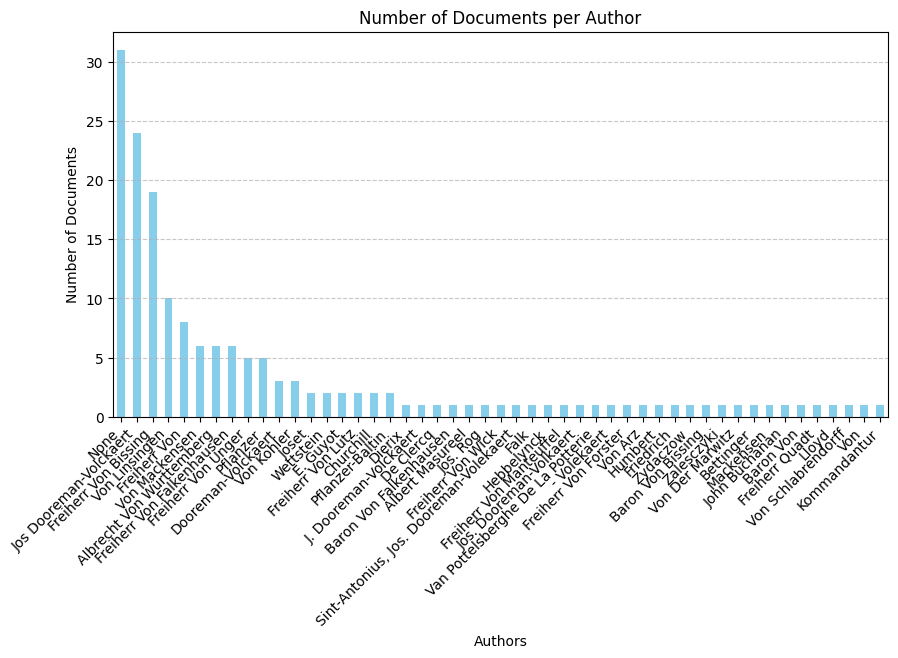

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each author
author_counts = df['authors'].value_counts()

# Plot
plt.figure(figsize=(10, 5))
author_counts.plot(kind='bar', color='skyblue')

# Labels & title
plt.xlabel("Authors")
plt.ylabel("Number of Documents")
plt.title("Number of Documents per Author")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


Function that can convert extracted date to the same string form.

In [ ]:
# Handle ordinal suffixes in day numbers
def remove_ordinal_suffix(day_str):
    if "August" in day_str:
      return re.sub(r'(nd|rd|th)', '', day_str)
    else:
      return re.sub(r'(st|nd|rd|th)', '', day_str)

# Function to convert extracted date into format dd.mm.yyyy
def format_date(date_str):
    if date_str:
        try:
            # Handle non-English months (like "Mei" -> "May")
            month_translation = {
                "Mei": "May",  # Dutch to English
                # Add more translations if needed
            }
            for non_english_month, english_month in month_translation.items():
                if non_english_month in date_str:
                    date_str = date_str.replace(non_english_month, english_month)

            # Handle specific formats
            # Case 1: "13-04-1916" -> Day-Month-Year format with hyphens
            if '-' in date_str:
                return datetime.strptime(date_str, '%d-%m-%Y').strftime('%d.%m.%Y')

            # Case 2: "January 1, 1917" -> Month Day, Year format with a comma
            elif ',' in date_str:
                return datetime.strptime(date_str, '%B %d, %Y').strftime('%d.%m.%Y')

            # Case 5: "7th of February 1917" -> Day with ordinal suffix, "of", Month, Year format
            elif 'of' in date_str:
                date_str = remove_ordinal_suffix(date_str)

                return datetime.strptime(date_str, '%d of %B %Y').strftime('%d.%m.%Y')

            # Case 4: "21st June 1916" -> Day with ordinal suffix, Month, Year format
            elif 'st' in date_str or 'nd' in date_str or 'rd' in date_str or 'th' in date_str:
                date_str = remove_ordinal_suffix(date_str)
                return datetime.strptime(date_str, '%d %B %Y').strftime('%d.%m.%Y')

            # Case 3: "1 December 1916" -> Day Month Year format
            elif ' ' in date_str and ',' not in date_str:
                return datetime.strptime(date_str, '%d %B %Y').strftime('%d.%m.%Y')

        except ValueError as e:
            return None
    return None

Now we want to extract date of poster publishing

In [ ]:
# Ordered list of regex patterns (most specific first)
date_patterns = [
    r'(\d{1,2})-(\d{1,2})-(\d{4})',  # "13-04-1916"
    r'([A-Za-z]+) (\d{1,2}),? (\d{4})',  # "January 1, 1917" and "February 26, 1917"
    r'(\d{1,2}) ([A-Za-z]+) (\d{4})',   # "1 December 1916"
    r'(\d{1,2})(?:st|nd|rd|th)? of ([A-Za-z]+) (\d{4})',  # "1st of April 1916"
    r'(\d{1,2})(?:st|nd|rd|th)? ([A-Za-z]+) (\d{4})'  # "21st June 1916"
]

# Function to extract the last occurrence of a date
def extract_last_date(text):
    # Find all matches in the text
    all_matches = []
    for pattern in date_patterns:
        matches = list(re.finditer(pattern, text))  # Find all occurrences
        all_matches.extend(matches)

    # If matches were found, return the last one
    if all_matches:
        for i in range(len(all_matches)):
          last_match = all_matches[-1-i]  # Get the last match
          if format_date(last_match.group(0)) is not None:
            return last_match.group(0)
    return None

# Apply function to extract dates
df['extracted_date'] = df['content'].apply(extract_last_date)

# Display result
print(df)

                                              filename  \
0    translated_FL4985340_108_DIGI_0035_00106_VIEW_...   
1    translated_FL4985310_102_DIGI_0035_00101_VIEW_...   
2    translated_FL4985300_100_DIGI_0035_00099b_VIEW...   
3    translated_FL4985315_103_DIGI_0035_00102_VIEW_...   
4    translated_FL4985110_62_DIGI_0035_00065_VIEW_M...   
..                                                 ...   
164  translated_FL4985653_167_DIGI_0035_00155_VIEW_...   
165  translated_FL4985663_169_DIGI_0035_00157_VIEW_...   
166  translated_FL4985648_166_DIGI_0035_00154_VIEW_...   
167  translated_FL4985624_163_DIGI_0035_00151_VIEW_...   
168  translated_FL4985673_171_DIGI_0035_00159_VIEW_...   

                                               content        extracted_date  \
0    EB. H. O. 7 Mei 1916.\n\nTo the Municipality o...            7 Mei 1916   
1    Regarding the declaration and trade\n\nof bed,...     November 22, 1917   
2    "Implementation Regulation for the regulation ...        1

We can manually check, whether the extracted dates are correct

In [ ]:
for i in range(len(df)):
  print(i)
  print(df['extracted_date'][i])
  print(df['content'][i])
  print("-----------------------------------------")

0
7 Mei 1916
EB. H. O. 7 Mei 1916.

To the Municipality of Melle.

1. In order to feed horses, it is requested to cut all young shoots from poplars, lindens, maples or sycamores, ashes, alders, willows, etc. These clippings must be dried slightly, then they are cut and mixed with oats or hay and thus serve as food for the horses. Until 23 June, report how many kilograms are available.

2. The expansion of pig breeding as much as possible is mandatory. One can register at the Town Hall for feed.

It is also mandatory to harvest as much hay as possible, and to let the animals graze the meadows only by plots, and to reseed the grazed spots.

3. Persons who have given up their horse to the German Authority, or have delivered their workshop, and who wish to buy a horse must register at the Town Hall tomorrow Sunday morning.

4. The attention of farmers is drawn to the new regulations for breeding bulls.

The Mayor,

Baron Van Pottelsberghe de la Potterie
------------------------------------

Now we can normalize dates

In [ ]:
df['normalized_date'] = df['extracted_date'].apply(format_date)

Lets display, whether the dates were normalized correctly

In [ ]:
for i in range(len(df)):
  print(df['normalized_date'][i])
  print(df['extracted_date'][i])
  print("-----------------------------------------")

07.05.1916
7 Mei 1916
-----------------------------------------
22.11.1917
November 22, 1917
-----------------------------------------
01.10.1917
1 October 1917
-----------------------------------------
04.06.1918
4 June 1918
-----------------------------------------
21.06.1915
21st June 1915
-----------------------------------------
12.02.1916
12th February 1916
-----------------------------------------
06.05.1915
May 6, 1915
-----------------------------------------
22.03.1915
March 22, 1915
-----------------------------------------
01.10.1917
1 October 1917
-----------------------------------------
19.07.1916
July 19, 1916
-----------------------------------------
26.07.1916
July 26, 1916
-----------------------------------------
26.07.1916
26th July 1916
-----------------------------------------
01.08.1916
August 1, 1916
-----------------------------------------
26.07.1916
July 26, 1916
-----------------------------------------
08.07.1916
July 8, 1916
------------------------------

Exploratory analysis of our dataset

In [ ]:
print("Number of documents:", len(df))
print("Number of documents with extracted dates:", df['extracted_date'].notna().sum())
print("Number of documents with normalized dates:", df['normalized_date'].notna().sum())
print("Percentage of documents with normalized date:" , round(100*df['normalized_date'].notna().sum()/len(df),2))
print("Average length of document:", round(np.average([len(df['content'][i]) for i in range(len(df))]),2))
print("Maximum length of document:", max([len(df['content'][i]) for i in range(len(df))]))
print("Minimum length of document:", min([len(df['content'][i]) for i in range(len(df))]))

Number of documents: 169
Number of documents with extracted dates: 103
Number of documents with normalized dates: 103
Percentage of documents with normalized date: 60.95
Average length of document: 2399.26
Maximum length of document: 9520
Minimum length of document: 52


We can visualize how many documents do we have per month

<ipython-input-149-b4ba112aecb8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['date'] = pd.to_datetime(df_plot['normalized_date'], format='%d.%m.%Y')


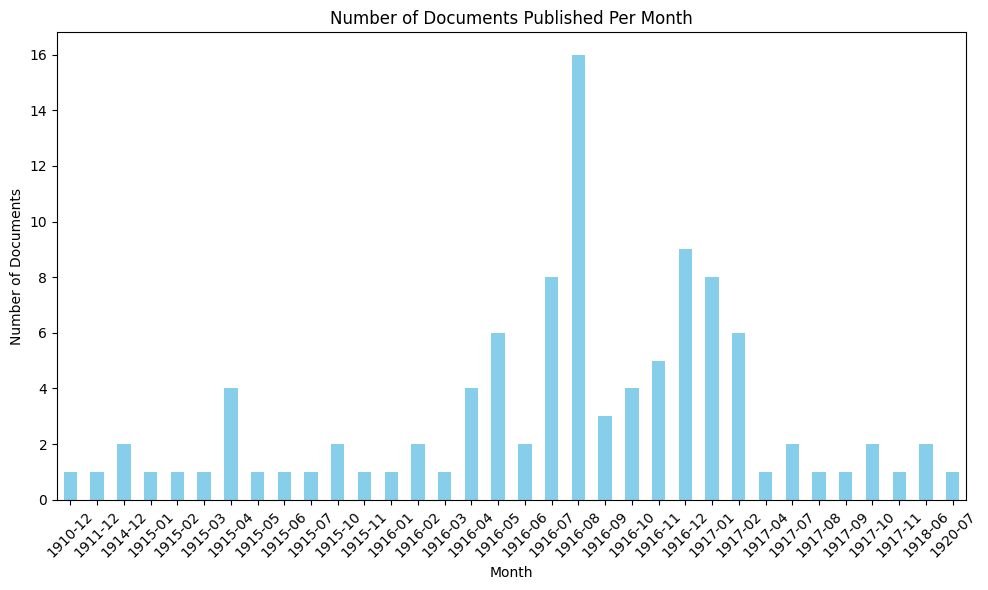

In [ ]:
# Drop rows where no date could be normalized
df_plot = df.dropna(subset=['normalized_date'])

# Convert the formatted date to datetime for easy handling
df_plot['date'] = pd.to_datetime(df_plot['normalized_date'], format='%d.%m.%Y')

# Group by year and month, then count the number of documents for each month
monthly_counts = df_plot.groupby(df_plot['date'].dt.to_period('M')).size()

# Plot the result
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Documents Published Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Documents')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Lets start with preprocessing.
Lets remove punctuanction and whitespaces.

In [ ]:
# Remove punctuation from the 'content' column
df.loc[:,'content_new'] = df.loc[:,'content'].str.replace(f"[{string.punctuation}]", " ", regex=True).str.lower()
df['content_new'] = df['content_new'].str.strip() #stripping trailing and leading whitespaces from the sentences

# Display the result
df

#Check if punctuation has indeed been removed
sorted(Counter(''.join(df['content_new'])).items()) #seems like there are still some punctuations in here so we'll remove them in next codeblock

[('\n', 5077),
 (' ', 75197),
 ('0', 971),
 ('1', 2064),
 ('2', 835),
 ('3', 523),
 ('4', 406),
 ('5', 481),
 ('6', 483),
 ('7', 278),
 ('8', 271),
 ('9', 668),
 ('a', 24670),
 ('b', 4949),
 ('c', 10299),
 ('d', 11584),
 ('e', 41005),
 ('f', 8340),
 ('g', 5829),
 ('h', 13801),
 ('i', 22468),
 ('j', 703),
 ('k', 2007),
 ('l', 13017),
 ('m', 8425),
 ('n', 23076),
 ('o', 24287),
 ('p', 7245),
 ('q', 404),
 ('r', 23042),
 ('s', 20768),
 ('t', 29511),
 ('u', 8755),
 ('v', 3117),
 ('w', 4182),
 ('x', 693),
 ('y', 4706),
 ('z', 563),
 ('§', 90),
 ('©', 1),
 ('\xad', 1),
 ('°', 5),
 ('²', 1),
 ('»', 3),
 ('½', 1),
 ('ß', 1),
 ('à', 1),
 ('â', 1),
 ('ä', 11),
 ('è', 4),
 ('é', 52),
 ('ë', 1),
 ('ó', 13),
 ('ö', 2),
 ('ü', 26),
 ('ł', 5),
 ('ś', 4),
 ('š', 1),
 ('ż', 1),
 ('–', 3),
 ('—', 250),
 ('‘', 3),
 ('’', 26),
 ('“', 10),
 ('”', 11)]

Let's erase all special characters that we find in our corpus.

In [ ]:
#characters around whose
target_characters = ['–', '‘', '’', '“', '”', '…', '\n', '{', '}', '_', '|', '*', '~', '\xad', '»', '©', '²', '½', '°', '—']

#check which words contain these characters - ’ is used in words like it's so we will keep this one but remove all others
def UnexpectedWords(column_name, target_chars):
  tokenizer = TreebankWordTokenizer()
  all_words = tokenizer.tokenize(' '.join(df[column_name]))

  target_words = [word for word in all_words if any(char in word for char in target_chars)]
  target_word_counts = Counter(target_words)

  return target_word_counts

for word, count in UnexpectedWords('content_new', target_characters).items():
    print(word, count)

#now we will remove them
def remove_specific_characters(text, characters_to_remove):
    for char in characters_to_remove:
        text = text.replace(char, '')
    return text

df['content_clean'] = df['content_new'].apply(lambda x: remove_specific_characters(x, target_characters))

d’ornementation 1
— 239
trader’s 1
‘liergegenstände’ 1
“militarisches 1
beschaffungsamt” 1
“commission 1
belgium” 1
“orts 1
” 4
“abschnittskommandanturen” 1
“zentral 2
japan’s 1
“goliath 1
ferdinand’s 1
protégé—a 1
sign—proves 1
employers’ 1
workers’ 1
enemy’s 1
25° 1
mackensen’s 2
“nieuwe 1
courant” 1
52½ 1
d’ampezzo 1
‘intrepid’ 1
and—how 1
—the 1
discovered—as 1
find—a 1
protégé—how 1
characteristic—proves 1
general” 1
militä­risches 1
d’udekem 2
d’acoz 2
traffic—except 1
traffic—is 1
bicycle—temporarily 1
year’s 1
122–123 1
232–234 1
n° 1
© 1
o’clock 1
– 1
‘state 1
’ 1
» 3
cm² 1
“rohstoff 2
abteilung” 2
commandant’s 5
latter’s 1
3° 1
4° 2
commands’ 1


In [ ]:
#Check if punctuation has indeed been removed
sorted(Counter(''.join(df['content_clean'])).items())

[(' ', 75197),
 ('0', 971),
 ('1', 2064),
 ('2', 835),
 ('3', 523),
 ('4', 406),
 ('5', 481),
 ('6', 483),
 ('7', 278),
 ('8', 271),
 ('9', 668),
 ('a', 24670),
 ('b', 4949),
 ('c', 10299),
 ('d', 11584),
 ('e', 41005),
 ('f', 8340),
 ('g', 5829),
 ('h', 13801),
 ('i', 22468),
 ('j', 703),
 ('k', 2007),
 ('l', 13017),
 ('m', 8425),
 ('n', 23076),
 ('o', 24287),
 ('p', 7245),
 ('q', 404),
 ('r', 23042),
 ('s', 20768),
 ('t', 29511),
 ('u', 8755),
 ('v', 3117),
 ('w', 4182),
 ('x', 693),
 ('y', 4706),
 ('z', 563),
 ('§', 90),
 ('ß', 1),
 ('à', 1),
 ('â', 1),
 ('ä', 11),
 ('è', 4),
 ('é', 52),
 ('ë', 1),
 ('ó', 13),
 ('ö', 2),
 ('ü', 26),
 ('ł', 5),
 ('ś', 4),
 ('š', 1),
 ('ż', 1)]

We will delete stopwords and store cleaned sentences into new attribute of our data-frame.

In [ ]:
stop_words1 = set(stopwords.words('english'))
stop_words = {word.replace("'", "’") for word in stop_words1} #replacing ' by ’ in the stopwords list, otherwise it won't remove some of them
df['content_clean_and_filtered'] = df['content_clean'].apply(
    lambda text: ' '.join(word for word in text.split() if word.lower() not in stop_words)
)
df['content_clean_and_filtered'] = df['content_clean_and_filtered'].apply(lambda x: re.sub(r"’s\b", '', x)) #removing the possessive 's from words, important grammatically but not for tokenization

df #sentences might not make sense grammatically but this is better for tokenization

,filename,content,extracted_date,normalized_date,content_new,content_clean,content_clean_and_filtered
0,translated_FL4985340_108_DIGI_0035_00106_VIEW_...,EB. H. O. 7 Mei 1916.\n\nTo the Municipality o...,7 Mei 1916,07.05.1916,eb h o 7 mei 1916 \n\nto the municipality o...,eb h o 7 mei 1916 to the municipality of me...,eb h 7 mei 1916 municipality melle 1 order fee...
1,translated_FL4985310_102_DIGI_0035_00101_VIEW_...,"Regarding the declaration and trade\n\nof bed,...","November 22, 1917",22.11.1917,regarding the declaration and trade\n\nof bed ...,regarding the declaration and tradeof bed hou...,regarding declaration tradeof bed house table ...
2,translated_FL4985300_100_DIGI_0035_00099b_VIEW...,"""Implementation Regulation for the regulation ...",1 October 1917,01.10.1917,implementation regulation for the regulation o...,implementation regulation for the regulation o...,implementation regulation regulation 22 septem...
3,translated_FL4985315_103_DIGI_0035_00102_VIEW_...,Regulation concerning the language of instruct...,4 June 1918,04.06.1918,regulation concerning the language of instruct...,regulation concerning the language of instruct...,regulation concerning language instruction sec...
4,translated_FL4985110_62_DIGI_0035_00065_VIEW_M...,"Announcement\n\nTo my regret, I have been able...",21st June 1915,21.06.1915,announcement\n\nto my regret i have been able...,announcementto my regret i have been able to ...,announcementto regret able ascertain bicycle t...
...,...,...,...,...,...,...,...
164,translated_FL4985653_167_DIGI_0035_00155_VIEW_...,"""COMMUNE MEIRELEKE\n\nBy order of the Etappen ...",10 February 1917,10.02.1917,commune meireleke\n\nby order of the etappen c...,commune meirelekeby order of the etappen comma...,commune meirelekeby order etappen command comm...
165,translated_FL4985663_169_DIGI_0035_00157_VIEW_...,"""Municipality of Merelbeke\n\nFrom this week o...",20 February 1917,20.02.1917,municipality of merelbeke\n\nfrom this week on...,municipality of merelbekefrom this week onward...,municipality merelbekefrom week onward meat so...
166,translated_FL4985648_166_DIGI_0035_00154_VIEW_...,Due to an order from the German authorities:\n...,7th of February 1917,07.02.1917,due to an order from the german authorities \n...,due to an order from the german authorities it...,due order german authorities hereby communicat...
167,translated_FL4985624_163_DIGI_0035_00151_VIEW_...,"""By this, all municipalities are strictly proh...",None,None,by this all municipalities are strictly prohi...,by this all municipalities are strictly prohi...,municipalities strictly prohibited cutting woo...


Expanding contractions such as for example "who'd" which were not captured by stopwords.

In [ ]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

df['content_clean_and_filtered'] = df['content_clean_and_filtered'].apply(expand_contractions)

It is clear that after expansion, there are again stopwords in our text so we will run the stopword removal again

In [ ]:
df['content_clean_and_filtered'] = df['content_clean_and_filtered'].apply(
    lambda text: ' '.join(word for word in text.split() if word.lower() not in stop_words))